In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
from string import digits
import seaborn as sns

C:\Users\Jane.000\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# importing data, getting dimensions
homes = pd.read_csv("Documents\super_realestate_data.csv")

In [3]:
# remove_digits = str.maketrans('', '', digits) 
# homes['neighborhood'] = homes['street address'].str.translate(remove_digits)
# len(homes['neighborhood'].unique())

In [4]:
# cleaning data and setting types

'''
but can we do this? does it mess up the data?
'''
homes['bath'] = homes['bath'].str.replace("+", "")

homes['bath'] = pd.to_numeric(homes['bath'])
homes['sqft'] = pd.to_numeric(homes['sqft'])
homes['price'] = pd.to_numeric(homes['price'])

In [5]:
corr = homes.corr()
corr

,listing id,postal code,latitude,longitude,price,bed,bath,sqft,garage
listing id,1.000000,-0.090484,0.033516,0.051818,0.058028,-0.043378,0.060628,0.017295,-0.072630
postal code,-0.090484,1.000000,-0.343275,-0.078753,-0.109089,-0.074490,-0.334695,-0.264800,0.126810
latitude,0.033516,-0.343275,1.000000,-0.217606,0.141361,0.097429,0.264340,0.280295,0.320580
longitude,0.051818,-0.078753,-0.217606,1.000000,-0.036771,-0.035500,0.033231,0.004860,-0.564365
price,0.058028,-0.109089,0.141361,-0.036771,1.000000,0.280439,0.402549,0.487603,0.731065
bed,-0.043378,-0.074490,0.097429,-0.035500,0.280439,1.000000,0.468309,0.635567,0.558227
bath,0.060628,-0.334695,0.264340,0.033231,0.402549,0.468309,1.000000,0.757952,0.094763
sqft,0.017295,-0.264800,0.280295,0.004860,0.487603,0.635567,0.757952,1.000000,0.538251
garage,-0.072630,0.126810,0.320580,-0.564365,0.731065,0.558227,0.094763,0.538251,1.000000


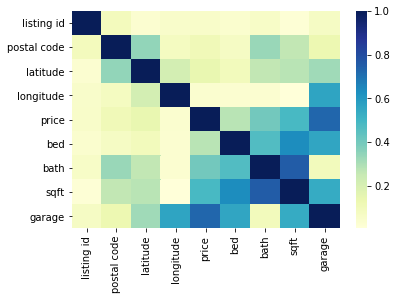

In [6]:
sns.heatmap(abs(corr), 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

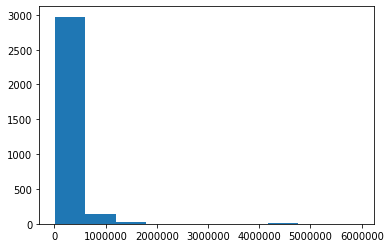

In [7]:
plt.hist(homes['price'])
plt.show()

In [8]:
homes['price'].describe()

count    3.145000e+03
mean     2.983172e+05
std      3.023897e+05
min      7.000000e+03
25%      1.680000e+05
50%      2.400000e+05
75%      3.530000e+05
max      5.947500e+06
Name: price, dtype: float64

In [9]:
# choosing specific collumns, removing the rest 
homes = homes[['prop type', 'city', 'postal code', 'price', 'bed', 'bath', 'sqft']]

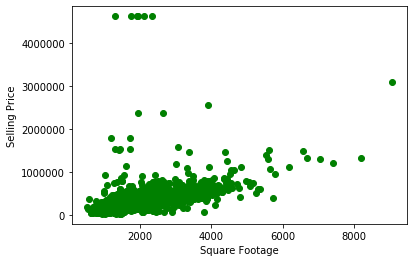

In [10]:
# Plotting the first realtionship between square feet and price
plt.scatter(homes['sqft'], homes['price'], color='g')
plt.xlabel('Square Footage')
plt.ylabel('Selling Price')
plt.show()

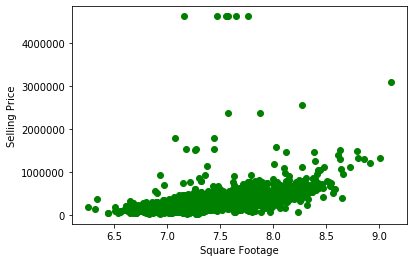

In [11]:
'''
is log better?
'''
plt.scatter(np.log(homes['sqft']), homes['price'], color='g')
plt.xlabel('Square Footage')
plt.ylabel('Selling Price')
plt.show()

In [12]:
homes["log sqft"] = np.log(homes["sqft"])
homes[["price", "log sqft", "sqft"]].corr()

,price,log sqft,sqft
price,1.000000,0.454497,0.487603
log sqft,0.454497,1.000000,0.957582
sqft,0.487603,0.957582,1.000000


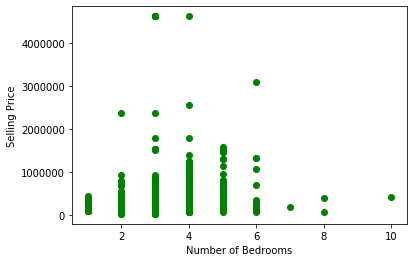

In [13]:
# Plotting the first realtionship between square feet and price
plt.scatter(homes['bed'], homes['price'], color='g')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Selling Price')
plt.show()

Text(0.5, 1.0, 'Selling Price by City')

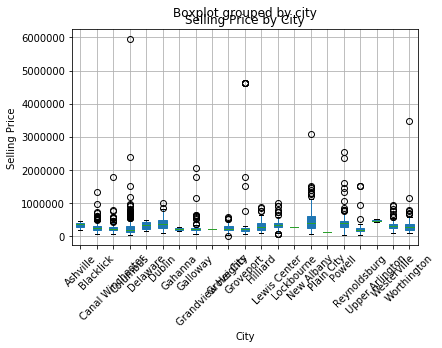

In [14]:
homes.boxplot(column='price', by='city', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Selling Price')
plt.title("Selling Price by City")

In [15]:
homes.groupby("city").describe()

postal code                                              \
                        count          mean        std      min       25%   
city                                                                        
Ashville                  3.0  43103.000000   0.000000  43103.0  43103.00   
Blacklick               236.0  43004.000000   0.000000  43004.0  43004.00   
Canal Winchester        246.0  43110.000000   0.000000  43110.0  43110.00   
Columbus                680.0  43217.185294  15.864887  43081.0  43207.00   
Delaware                  4.0  43015.000000   0.000000  43015.0  43015.00   
Dublin                  256.0  43016.449219   0.498389  43016.0  43016.00   
Gahanna                   2.0  43230.000000   0.000000  43230.0  43230.00   
Galloway                148.0  43119.000000   0.000000  43119.0  43119.00   
Grandview Heights         1.0  43212.000000        NaN  43212.0  43212.00   
Grove City              156.0  43123.000000   0.000000  43123.0  43123.00   
Groveport               105.0  43125.000000   0.000000  43125.0  43125.00   
Hilliard                149.0  43026.000000   0.000000  43026.0  43026.00   
Lewis Center            198.0  43035.000000   0.000000  43035.0  43035.00   
Lockbourne                2.0  43137.000000   0.000000  43137.0  43137.00   
New Albany              200.0  43054.000000   0.000000  43054.0  43054.00   
Plain City                1.0  43064.000000        NaN  43064.0  43064.00   
Powell                  143.0  43065.000000   0.000000  43065.0  43065.00   
Reynoldsburg            227.0  43068.000000   0.000000  43068.0  43068.00   
Upper Arlington           2.0  43220.500000   0.707107  43220.0  43220.25   
Westerville             245.0  43081.306122   0.461825  43081.0  43081.00   
Worthington             141.0  43085.000000   0.000000  43085.0  43085.00   

                                               price                 ...  \
                       50%       75%      max  count           mean  ...   
city                                                                 ...   
Ashville           43103.0  43103.00  43103.0    3.0  325666.666667  ...   
Blacklick          43004.0  43004.00  43004.0  236.0  256764.576271  ...   
Canal Winchester   43110.0  43110.00  43110.0  246.0  231681.276423  ...   
Columbus           43220.0  43228.00  43240.0  680.0  242431.285294  ...   
Delaware           43015.0  43015.00  43015.0    4.0  312408.250000  ...   
Dublin             43016.0  43017.00  43017.0  256.0  374167.277344  ...   
Gahanna            43230.0  43230.00  43230.0    2.0  202500.000000  ...   
Galloway           43119.0  43119.00  43119.0  148.0  250779.729730  ...   
Grandview Heights  43212.0  43212.00  43212.0    1.0  205000.000000  ...   
Grove City         43123.0  43123.00  43123.0  156.0  236541.666667  ...   
Groveport          43125.0  43125.00  43125.0  105.0  470051.314286  ...   
Hilliard           43026.0  43026.00  43026.0  149.0  291594.697987  ...   
Lewis Center       43035.0  43035.00  43035.0  198.0  343136.030303  ...   
Lockbourne         43137.0  43137.00  43137.0    2.0  260000.000000  ...   
New Albany         43054.0  43054.00  43054.0  200.0  472950.000000  ...   
Plain City         43064.0  43064.00  43064.0    1.0  107300.000000  ...   
Powell             43065.0  43065.00  43065.0  143.0  424980.048951  ...   
Reynoldsburg       43068.0  43068.00  43068.0  227.0  207212.334802  ...   
Upper Arlington    43220.5  43220.75  43221.0    2.0  460000.000000  ...   
Westerville        43081.0  43082.00  43082.0  245.0  304580.673469  ...   
Worthington        43085.0  43085.00  43085.0  141.0  310724.113475  ...   

                      sqft         log sqft                                \
                       75%     max    count      mean       std       min   
city                                                                        
Ashville           2005.00  2206.0      3.0  7.502861  0.193575  7.311886   
Blacklick          2222.00  8179.0  

Text(0, 0.5, 'Square Footage')

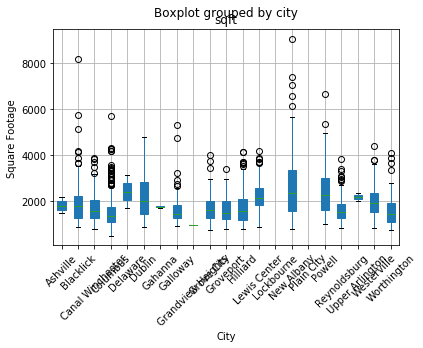

In [16]:
'''
I don't remember how to tell if there is an interaction
'''

homes.boxplot(column='sqft', by='city', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Square Footage')

Text(0.5, 1.0, 'Selling Price by Number of Bedrooms')

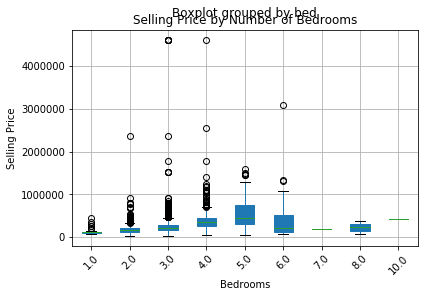

In [17]:
homes.boxplot(column='price', by='bed', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Bedrooms')
plt.ylabel('Selling Price')
plt.title("Selling Price by Number of Bedrooms")

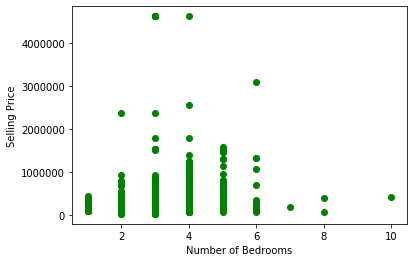

In [18]:
'''
not linear
'''

plt.scatter(homes['bed'], homes['price'], color='g')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Selling Price')
plt.show()

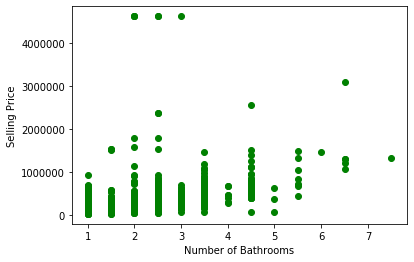

In [19]:
plt.scatter(homes['bath'], homes['price'], color='g')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Selling Price')
plt.show()

Text(0.5, 1.0, 'Selling Price by Number of Bathrooms')

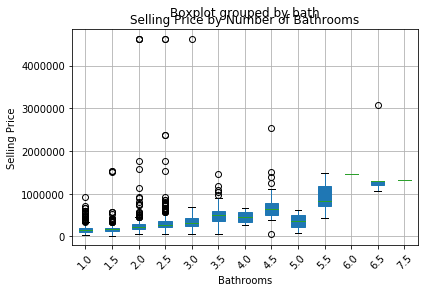

In [20]:
homes.boxplot(column='price', by='bath', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Bathrooms')
plt.ylabel('Selling Price')
plt.title("Selling Price by Number of Bathrooms")

Text(0.5, 1.0, 'Selling Price by Property Type')

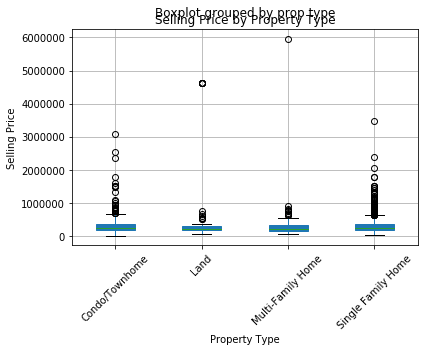

In [21]:
homes.boxplot(column='price', by='prop type', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Selling Price')
plt.title("Selling Price by Property Type")

In [22]:
homes.groupby("prop type").describe()

postal code                                             \
                         count          mean        std      min      25%   
prop type                                                                   
Condo/Townhome           790.0  43097.575949  71.754925  43004.0  43054.0   
Land                      88.0  43065.068182  60.507774  43004.0  43004.0   
Multi-Family Home        132.0  43180.212121  65.301769  43016.0  43182.0   
Single Family Home      2135.0  43095.216393  69.999860  43004.0  43035.0   

                                                price                 ...  \
                        50%      75%      max   count           mean  ...   
prop type                                                             ...   
Condo/Townhome      43081.0  43125.0  43240.0   790.0  301460.786076  ...   
Land                43089.5  43125.0  43125.0    88.0  530746.590909  ...   
Multi-Family Home   43207.0  43221.5  43235.0   132.0  308922.727273  ...   
Single Family Home  43081.0  43123.0  43240.0  2135.0  286918.073536  ...   

                      sqft         log sqft                                \
                       75%     max    count      mean       std       min   
prop type                                                                   
Condo/Townhome      2235.5  9052.0    720.0  7.455120  0.400410  6.436150   
Land                1912.0  3438.0     75.0  7.336672  0.337776  6.677083   
Multi-Family Home   1889.5  4346.0    119.0  7.286196  0.386677  6.253829   
Single Family Home  2244.0  8179.0   1947.0  7.452194  0.396260  6.313548   

                                                            
                         25%       50%       75%       max  
prop type                                                   
Condo/Townhome      7.167038  7.417580  7.712220  9.110741  
Land                7.111511  7.340836  7.555903  8.142645  
Multi-Family Home   7.088407  7.287561  7.544055  8.377011  
Single Family Home  7.156956  7.421776  7.716015  9.009325  

[4 rows x 48 columns]

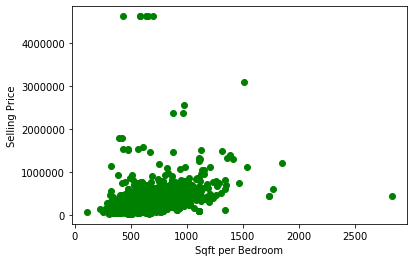

In [23]:
'''
Much more linear than bedrooms
'''
homes["sqft per bed"] = homes['sqft']/homes['bed']
plt.scatter(homes["sqft per bed"], homes['price'], color='g')
plt.xlabel('Sqft per Bedroom')
plt.ylabel('Selling Price')
plt.show()

In [24]:
homes["log sqft"] = np.log(homes["sqft"])
homes[["price", "sqft per bed", "bed"]].corr()

,price,sqft per bed,bed
price,1.000000,0.362753,0.280439
sqft per bed,0.362753,1.000000,-0.006851
bed,0.280439,-0.006851,1.000000


In [25]:
##Drop NaN values found in sqft and resetting index 
homes.dropna(inplace = True)
homes.reset_index(drop=True, inplace = True)
homes.head(5)

,prop type,city,postal code,price,bed,bath,sqft,log sqft,sqft per bed
0,Condo/Townhome,Dublin,43016,240000,3.0,2.0,1544.0,7.342132,514.666667
1,Condo/Townhome,Westerville,43081,179900,2.0,2.0,1466.0,7.290293,733.000000
2,Condo/Townhome,Westerville,43081,404000,3.0,3.0,2400.0,7.783224,800.000000
3,Condo/Townhome,Columbus,43240,245000,2.0,3.5,2058.0,7.629490,1029.000000
4,Condo/Townhome,Columbus,43206,198000,2.0,1.0,1215.0,7.102499,607.500000


In [26]:
# I do not want to include land properties in this analysis so I will sort them out 
homes['prop type'].unique()

# removing property type land:
homes = homes[(homes['prop type'] != 'Land')]

In [27]:
# Preparing to make ML model for SLR
x = homes['sqft'].values.reshape(-1,1)
y = homes['price'].values.reshape(-1,1)

In [28]:
# Splits data into testing vs training set then creats model 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor.intercept_)
print(regressor.coef_)

[-28034.14874186]
[[166.69383045]]


In [29]:
# Outputs actual selling price vs model prediction
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(5)

,Actual,Predicted
0,399900,446876.574223
1,251500,332024.525040
2,270000,177332.650378
3,850000,650409.741208
4,95000,157162.696893


In [30]:
# Now I start with MLR

In [31]:
# Seeing how many homes I still have in my data set
homes.shape

(2785, 9)

In [32]:
# Single Family vs not
#homes['Single Family?'] = homes.apply(lambda x: (1 if x['prop type'] == 'Single Family Home' else 0), axis=1)

In [33]:
# We have 15 unique cities- I will 
# cities = homes['city'].unique()
# for city in cities:
#     homes[city] = homes.apply(lambda x: (1 if x['city'] == city else 0), axis=1)

In [34]:
'''
interaction with city ans sqft??
'''

'\ninteraction with city ans sqft??\n'

In [35]:
# X = homes[['bath', 'sqft', 'sqft per bed', 'Westerville', 'Blacklick', 'Columbus', 
#           'Grove City', 'Dublin', 'Canal Winchester', 'Groveport', 
#           'Worthington', 'Hilliard', 'New Albany', 'Galloway', 'Reynoldsburg', 
#           'Powell', 'Lewis Center']]

X = homes[['bath', 'sqft', 'sqft per bed']]
Y = homes['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
model= regressor.fit(X_train, y_train) 
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -49330.35196707252
Coefficients: 
 [2.58981562e+04 1.43530822e+02 1.25969749e+01]


In [37]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [38]:
df.head(10)

,Actual,Predicted
1554,399900,433306.546192
682,251500,334511.436290
882,270000,158570.934811
2688,850000,638301.062819
1188,95000,162974.864874
227,117000,116172.478253
1548,177000,208395.189284
1904,202400,335693.274801
320,139000,106383.743813
983,250000,234513.824629


In [39]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     838.4
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:30:50   Log-Likelihood:                -37062.
No. Observations:                2785   AIC:                         7.413e+04
Df Residuals:                    2781   BIC:                         7.416e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.497e+04   9826.186     -5.594   

In [40]:
# We have 15 unique cities- I will 
zip_codes = homes['postal code'].unique()
for zip_code in zip_codes:
    homes[zip_code] = homes.apply(lambda x: (1 if x['postal code'] == zip_code else 0), axis=1)

homes["postal code"].unique()

array([43016, 43081, 43240, 43206, 43223, 43215, 43123, 43211, 43230,
       43110, 43209, 43227, 43201, 43205, 43219, 43228, 43125, 43085,
       43220, 43054, 43221, 43026, 43231, 43224, 43235, 43204, 43119,
       43068, 43229, 43232, 43207, 43004, 43203, 43222, 43065, 43017,
       43213, 43202, 43214, 43212, 43035, 43015, 43082, 43103],
      dtype=int64)

In [41]:
homes

,prop type,city,postal code,price,bed,bath,sqft,log sqft,sqft per bed,43016,...,43065,43017,43213,43202,43214,43212,43035,43015,43082,43103
0,Condo/Townhome,Dublin,43016,240000,3.0,2.0,1544.0,7.342132,514.666667,1,...,0,0,0,0,0,0,0,0,0,0
1,Condo/Townhome,Westerville,43081,179900,2.0,2.0,1466.0,7.290293,733.000000,0,...,0,0,0,0,0,0,0,0,0,0
2,Condo/Townhome,Westerville,43081,404000,3.0,3.0,2400.0,7.783224,800.000000,0,...,0,0,0,0,0,0,0,0,0,0
3,Condo/Townhome,Columbus,43240,245000,2.0,3.5,2058.0,7.629490,1029.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,Condo/Townhome,Columbus,43206,198000,2.0,1.0,1215.0,7.102499,607.500000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,Single Family Home,Lewis Center,43035,519500,4.0,2.5,2796.0,7.935945,699.000000,0,...,0,0,0,0,0,0,1,0,0,0
2856,Single Family Home,Lewis Center,43035,340000,4.0,2.5,2516.0,7.830426,629.000000,0,...,0,0,0,0,0,0,1,0,0,0
2857,Single Family Home,Lewis Center,43035,379000,4.0,2.5,2553.0,7.845024,638.250000,0,...,0,0,0,0,0,0,1,0,0,0
2858,Single Family Home,Lewis Center,43035,428000,4.0,3.5,3484.0,8.155936,871.000000,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
'''
interaction with city ans sqft??
'''

'\ninteraction with city ans sqft??\n'

In [43]:
# X = homes[['bath', 'sqft', 'sqft per bed', 'Westerville', 'Blacklick', 
#            'Columbus', 'Grove City', 'Dublin', 'Canal Winchester', 
#            'Groveport', 'Worthington', 'Hilliard', 'New Albany', 'Galloway', 
#            'Reynoldsburg', 'Powell', 'Lewis Center', '43016', '43081', '43240', 
#            '43206', '43223', '43215', '43123', '43211', '43230','43110', '43209', 
#            '43227', '43201', '43205', '43219', '43228', '43125', '43085','43220', 
#            '43054', '43221', '43026', '43231', '43224', '43235', '43204', '43119',
#            '43068', '43229', '43232', '43207', '43004', '43203', '43222', '43065', 
#            '43017','43213', '43202', '43214', '43212', '43035']]

# X = homes[['bath', 'sqft', 'sqft per bed', 'Westerville', 'Blacklick', 
#            'Columbus', 'Grove City', 'Dublin', 'Canal Winchester', 
#            'Groveport', 'Worthington', 'Hilliard', 'New Albany', 'Galloway', 
#            'Reynoldsburg', 'Powell', 'Lewis Center', 43016, 43081, 43240, 43206, 43223, 43215, 43123, 43211, 43230,
#        43110, 43209, 43227, 43201, 43205, 43219, 43228, 43125, 43085,
#        43220, 43054, 43221, 43026, 43231, 43224, 43235, 43204, 43119,
#        43068, 43229, 43232, 43207, 43004, 43203, 43222, 43065, 43017,
#        43213, 43202, 43214, 43212, 43035]]

X = homes[['bath', 'sqft', 'sqft per bed',43016, 43081, 43240, 43206, 43223, 43215, 43123, 43211, 43230,
       43110, 43209, 43227, 43201, 43205, 43219, 43228, 43125, 43085,
       43220, 43054, 43221, 43026, 43231, 43224, 43235, 43204, 43119,
       43068, 43229, 43232, 43207, 43004, 43203, 43222, 43065, 43017,
       43213, 43202, 43214, 43212, 43035]]

Y = homes['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
model= regressor.fit(X_train, y_train) 
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -5435.007221350563
Coefficients: 
 [ 2.01996166e+04  1.45964218e+02 -4.22013479e+01  1.54796594e+04
 -5.49219639e+03 -1.24759619e+04 -2.59649473e+04 -7.80558849e+04
  3.75299096e+05 -3.20584186e+04 -7.08663987e+04  2.33244772e+03
 -3.98113942e+04  1.71992723e+04 -5.47272319e+04  1.34242534e+05
 -3.29438645e+04 -1.92728478e+04 -2.39432427e+04 -3.80206762e+04
  4.60942819e+04  4.83029899e+04  6.53277574e+04  1.31183280e+05
  1.57144360e+02 -3.58026672e+03 -4.05315179e+04  5.49764378e+03
 -4.98062706e+04 -1.83231447e+04 -4.79174769e+04 -4.34225463e+04
 -7.15730821e+04 -5.20760990e+04 -5.40500655e+04 -2.01933310e+05
 -3.77872890e+04  6.74082350e+04  3.44283507e+04 -7.18503914e+04
  6.51407905e+04  1.08804772e+05  1.90257363e+05 -1.28933314e+04]


In [45]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [46]:
df.head(10)

,Actual,Predicted
1554,399900,446337.841601
682,251500,306018.532644
882,270000,311504.373614
2688,850000,683806.382824
1188,95000,86094.901230
227,117000,67834.289005
1548,177000,221367.938818
1904,202400,292996.275890
320,139000,44202.097342
983,250000,243696.789829


In [47]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     72.17
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:30:57   Log-Likelihood:                -36887.
No. Observations:                2785   AIC:                         7.386e+04
Df Residuals:                    2740   BIC:                         7.413e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.064e+04   2.01e+04     -0.530   

In [48]:
for_sale = pd.read_csv("Documents\ForSaleRealEstate.csv")
for_sale = for_sale[["postal code", "bed", "bath", "sqft"]]
for_sale = for_sale[(homes["bed"] != 'Studio')]
for_sale["bath"] = for_sale["bath"].replace("+", "")

C:\Users\Jane.000\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Jane.000\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
for_sale["estimate"] = regressor.predict(for_sale)

ValueError: could not convert string to float: '1.5+'